# Supplement to 6.1
I went through and tested the toy dataset with a couple of algorithms.

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_s_curve
from sklearn.datasets.samples_generator import make_checkerboard
from sklearn.datasets.samples_generator import make_swiss_roll

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
#from sklearn.neighbors import kneighbors_graph
#from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
#from itertools import cycle, islice

In [2]:
np.random.seed(0)
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# code to generate datasets is from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
# ============
n_samples = 1500

blobs_X,blobs_y = datasets.make_blobs(n_samples=n_samples, random_state=8)
circles_X,circles_y = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05,random_state=8)
moons_X,moons_y = datasets.make_moons(n_samples=n_samples, noise=.05,random_state=8)
scurve_X, scurve_y = datasets.make_s_curve(n_samples=n_samples,noise=.05,random_state=8)
swiss_X, swiss_y = datasets.make_swiss_roll(n_samples=n_samples,noise=.05,random_state=8)
nos_X,nos_y = np.random.rand(n_samples, 2), None


# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso_X,aniso_y = (X_aniso, y)

# blobs with varied variances
var_X, var_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

## k-Means Clustering

source:http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### k-Means on Blob Toy Data

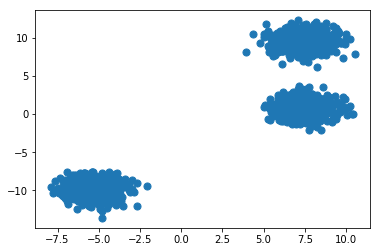

In [3]:
kmeans_blobs = KMeans(n_clusters=3)
kmeans_blobs.fit(blobs_X)
y_kmeans_blobs = kmeans_blobs.predict(blobs_X)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], s=50);

#### k-Means on Circles Toy Data

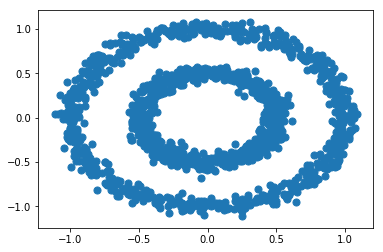

In [4]:
kmeans_circles = KMeans(n_clusters=3)
kmeans_circles.fit(circles_X)
y_kmeans_circles = kmeans_circles.predict(circles_X)
plt.scatter(circles_X[:, 0], circles_X[:, 1], s=50);

#### k-Means on Moons Toy Data

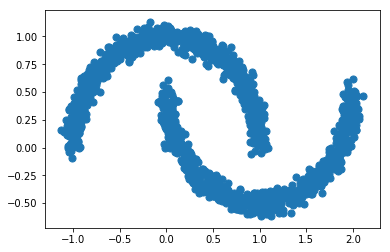

In [5]:
kmeans_moons = KMeans(n_clusters=3)
kmeans_moons.fit(moons_X)
y_kmeans_moons = kmeans_moons.predict(circles_X)
plt.scatter(moons_X[:, 0], moons_X[:, 1], s=50);

#### k-Means on S_Curve Toy Data

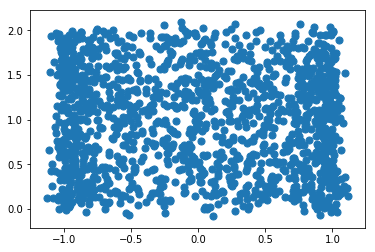

In [6]:
kmeans_s_curves = KMeans(n_clusters=15)
kmeans_s_curves.fit(scurve_X)
y_kmeans_s_curves = kmeans_s_curves.predict(scurve_X)
plt.scatter(scurve_X[:, 0], scurve_X[:, 1], s=50);

#### k-Means on Swiss Roll Toy Data

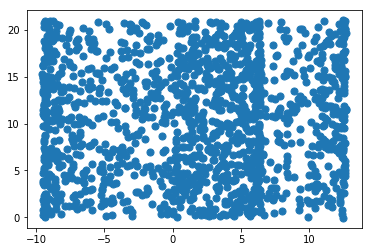

In [7]:
kmeans_swiss = KMeans(n_clusters=3)
kmeans_swiss.fit(swiss_X)
y_kmeans_swiss = kmeans_swiss.predict(swiss_X)
plt.scatter(swiss_X[:, 0], swiss_X[:, 1], s=50);

#### k-Means on Unstructured Toy Data

source:http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html

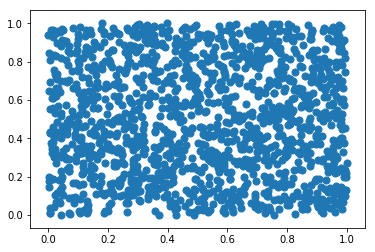

In [8]:
kmeans_nos = KMeans(n_clusters=3)
kmeans_nos.fit(nos_X)
y_kmeans_nos = kmeans_nos.predict(nos_X)
plt.scatter(nos_X[:, 0], nos_X[:, 1], s=50);

#### k-Means on Anisotropicly Distributed Toy Data

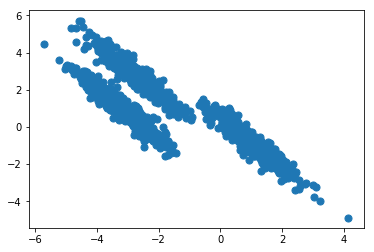

In [9]:
kmeans_aniso = KMeans(n_clusters=3)
kmeans_aniso.fit(aniso_X)
y_kmeans_aniso = kmeans_aniso.predict(aniso_X)
plt.scatter(aniso_X[:, 0], aniso_X[:, 1], s=50);

#### k-Means on Varied Variance Toy Data

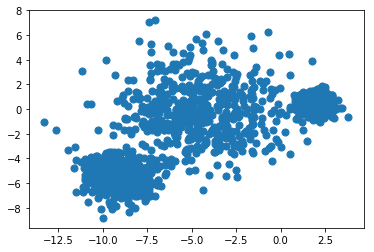

In [10]:
kmeans_var = KMeans(n_clusters=3)
kmeans_var.fit(var_X)
y_kmeans_var = kmeans_var.predict(var_X)
plt.scatter(var_X[:, 0], var_X[:, 1], s=50);

k-means was able to handle clustering on blob, cirlces, moons, and Anisotropic datasets.  
It was not able to cluster on S-curve, swiss roll, unstructrued, and varied variance.

## t-NSE (t-distributed Stochastic Neighbor Embedding)

source:http://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

#### t-SNE Clustering on S-Curve Toy Data

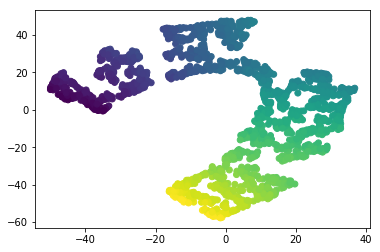

In [11]:
tsne = TSNE(n_components=2, init='random',random_state=0, perplexity=100)
tsne_model = TSNE(learning_rate=100)
tsne_trans = tsne_model.fit_transform(scurve_X)

x_axis = tsne_trans[:, 0]
y_axis = tsne_trans[:, 1]

plt.scatter(x_axis, y_axis, c=scurve_y)
plt.show()

#### t-SNE on Swissroll Toy Data

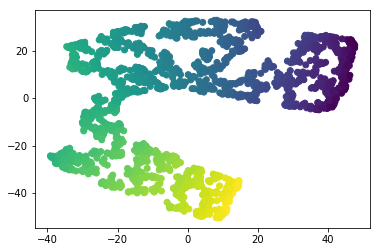

In [12]:
tsne = TSNE(n_components=2, init='random',random_state=0, perplexity=100)
tsne_model = TSNE(learning_rate=100)
tsne_trans = tsne_model.fit_transform(swiss_X)

x_axis = tsne_trans[:, 0]
y_axis = tsne_trans[:, 1]

plt.scatter(x_axis, y_axis, c=swiss_y)
plt.show()

#### t-SNE on No Structure Toy Data

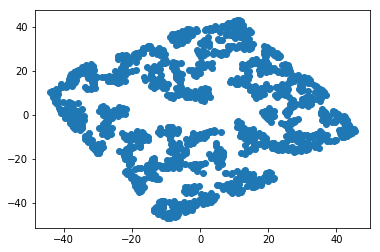

In [13]:
tsne = TSNE(n_components=2, init='random',random_state=0, perplexity=100)
tsne_model = TSNE(learning_rate=100)
tsne_trans = tsne_model.fit_transform(nos_X)

x_axis = tsne_trans[:, 0]
y_axis = tsne_trans[:, 1]

plt.scatter(x_axis, y_axis, c=nos_y)
plt.show()

#### t-SNE on  Anisotropicly Distributed Toy Data

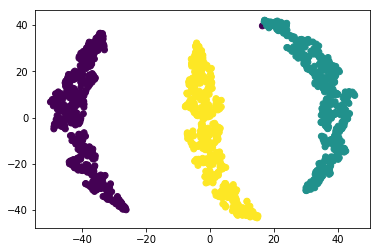

In [14]:
tsne = TSNE(n_components=2, init='random',random_state=0, perplexity=100)
tsne_model = TSNE(learning_rate=100)
tsne_trans = tsne_model.fit_transform(aniso_X)

x_axis = tsne_trans[:, 0]
y_axis = tsne_trans[:, 1]

plt.scatter(x_axis, y_axis, c=aniso_y)
plt.show()

#### t-SNE on Toy Data with Varied Varience

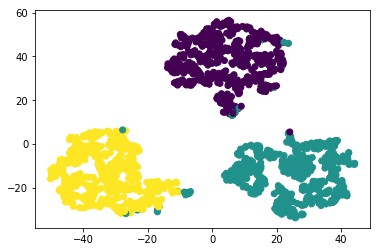

In [15]:
tsne = TSNE(n_components=2, init='random',random_state=0, perplexity=100)
tsne_model = TSNE(learning_rate=100)
tsne_trans = tsne_model.fit_transform(var_X)

x_axis = tsne_trans[:, 0]
y_axis = tsne_trans[:, 1]

plt.scatter(x_axis, y_axis, c=var_y)
plt.show()

The t-SNE algorithm was better able to cluster the data that k-Mean stuggled with. Using a high perplexity parameter the clusters were able to be form from data with higher variances or complex dimension. 

perplexity : float, optional (default: 30)
The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. The choice is not extremely critical since t-SNE is quite insensitive to this parameter.